In [40]:
#importing essential libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
#Data Creation and Exploration

data={'temperature':range(30,101),'sales':[50+1.5*temp+10*torch.randn(1).item() for temp in range(30,101)]}
icecream_data=pd.DataFrame(data)
icecream_data.head(3)

,temperature,sales
0,30,97.516662
1,31,99.737675
2,32,98.900745


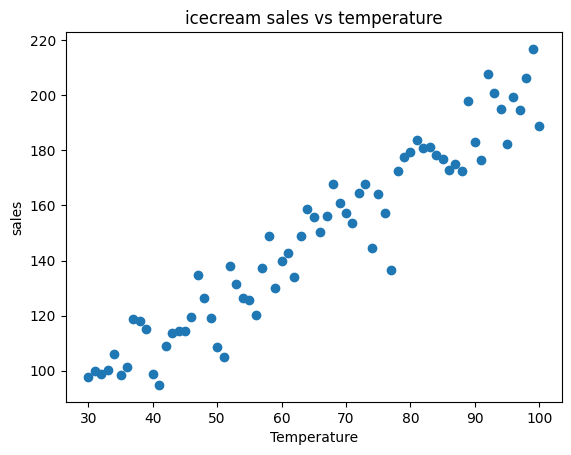

In [4]:
#visualization relationship
plt.scatter(icecream_data['temperature'],icecream_data['sales'])
plt.xlabel('Temperature')
plt.ylabel('sales')
plt.title('icecream sales vs temperature')
plt.show()

In [6]:
# Device agnostic conditional : gpu/cpu
device='cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device is :{device}')

Device is :cpu


In [41]:
#preprocessing the data
X=icecream_data['temperature']
y=icecream_data['sales']
scaler=StandardScaler()
X_new=X.to_frame()
X_scaler=scaler.fit_transform(X_new)
X_tensor=torch.tensor(X_scaler,dtype=torch.float32)
y_tensor=torch.tensor(y.values,dtype=torch.float32).view(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_tensor,y_tensor,test_size=0.2,random_state=42)

In [35]:
# Model Building
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size):
        super(LinearRegressionModel,self).__init__()
        self.linear=nn.Linear(input_size,1)
    def forward(self,x):
        return self.linear(x)
model=LinearRegressionModel(X_train.shape[1])

In [36]:
#model Training
loss_function=nn.MSELoss()   #Loss_function calculating
optimizer=optim.SGD(model.parameters(),lr=0.02)  #Learning rate in optimizer
epochs=400
train_loss_values=[]

In [38]:
for epoch in range(epochs):
    #Forward propagation in neural network
    model.train()
    y_pred=model(X_train)
    #Loss Function
    loss=loss_function(y_pred,y_train)
    #Backward Propagation
    optimizer.zero_grad()
    loss.backward()
    #update parameters
    optimizer.step()

    #Store loss values for visualization
    train_loss_values.append(loss.item())

    if epoch % 10 ==0:
        print(f'epoch :{epoch},Training loss:{loss}')


epoch :0,Training loss:24150.22265625
epoch :10,Training loss:10345.9619140625
epoch :20,Training loss:4487.6689453125
epoch :30,Training loss:1989.9300537109375
epoch :40,Training loss:919.5137939453125
epoch :50,Training loss:458.1982421875
epoch :60,Training loss:258.1735534667969
epoch :70,Training loss:170.87777709960938
epoch :80,Training loss:132.51829528808594
epoch :90,Training loss:115.54145050048828
epoch :100,Training loss:107.97286224365234
epoch :110,Training loss:104.57352447509766
epoch :120,Training loss:103.0354995727539
epoch :130,Training loss:102.33457946777344
epoch :140,Training loss:102.01285552978516
epoch :150,Training loss:101.86424255371094
epoch :160,Training loss:101.79512023925781
epoch :170,Training loss:101.7628173828125
epoch :180,Training loss:101.74760437011719
epoch :190,Training loss:101.74043273925781
epoch :200,Training loss:101.73701477050781
epoch :210,Training loss:101.73539733886719
epoch :220,Training loss:101.73462677001953
epoch :230,Train

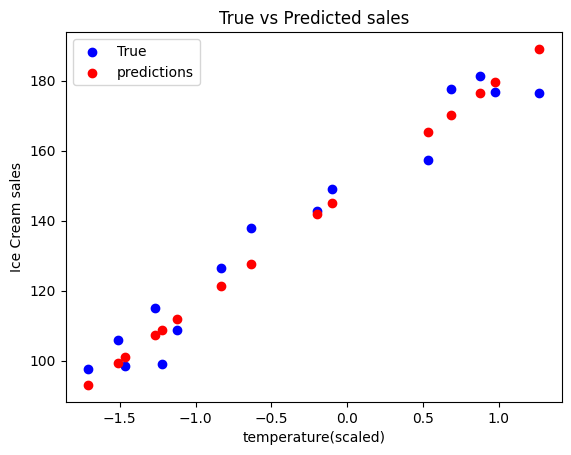

In [39]:
#model evaluation based on test data

model.eval()
with torch.no_grad():
    predictions=model(X_test)
    plt.scatter(X_test.numpy(),y_test.numpy(),label='True',color='blue')
    plt.scatter(X_test.numpy(),predictions.numpy(),label='predictions',color='red')
    plt.xlabel('temperature(scaled)')
    plt.ylabel('Ice Cream sales')
    plt.title('True vs Predicted sales')
    plt.legend()
    plt.show()